# Manual Testing

In [1]:
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 6]

In [4]:
X, y = datasets.make_classification(n_samples=20, n_features=2, n_classes=2,
                                    n_informative=2, n_redundant=0, random_state=42)

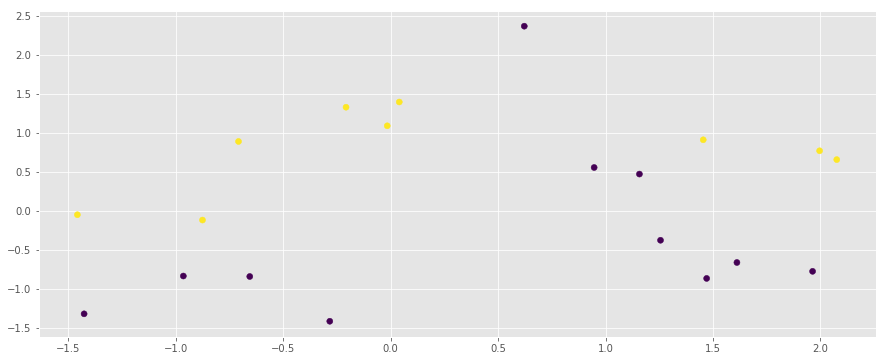

In [5]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
from mlscratch.kNN import kNNClassifier

In [9]:
cls = kNNClassifier(k=2)

In [10]:
cls.fit(X_train, y_train)

In [11]:
y_pred = cls.predict(X_test)
y_pred

array([1, 0, 0, 1, 0])

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
sk_cls = KNeighborsClassifier(n_neighbors=2)

In [14]:
sk_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [15]:
sk_cls.predict(X_test)

array([1, 0, 0, 1, 0])

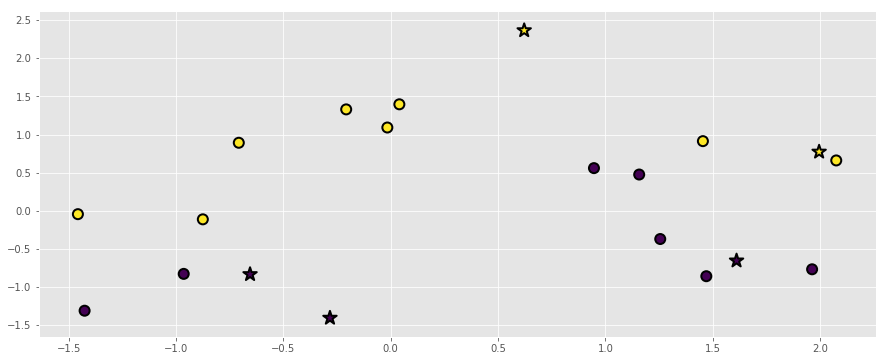

In [16]:
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, edgecolors='k', lw=2, s=100)
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, marker='*',
            s=200, lw=2, edgecolors='k')

# Automated testing for multiple cases

In [17]:
import numpy as np

In [18]:
for n_samples in [50, 100, 200]:
    for k in [2, 5, 10]:
        X, y = datasets.make_classification(n_samples=n_samples, n_features=2,
                                            n_classes=2, n_informative=2,
                                            n_redundant=0, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        cls = kNNClassifier(k=k)
        cls.fit(X_train, y_train)
        y_pred = cls.predict(X_test)
        sk_cls = KNeighborsClassifier(n_neighbors=k)
        sk_cls.fit(X_train, y_train)
        y_pred_sk = sk_cls.predict(X_test)
        assert np.array_equal(y_pred, y_pred_sk)